# 三種搭建神經網路的方式

* 分為三種：
  * sequential: 寫法簡單明瞭適合初學者快速地搭建神經網路  
  * funcitional: 有技巧性的將網路包成一個函式且支援多個輸入與輸出，並且在神經網路傳遞過程中能夠動態的掌握資料流  
  * sub-class of `Model`: 更進階，如果要包裝成產品或是自定義神經網路演算法時就建議使用這種方法  
* 以下，以 `iris` 資料集為例，示範三種寫法 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data

In [2]:
df_train = pd.read_csv('Iris.csv')
df_train = df_train.drop(labels=['Id'],axis=1) # 移除Id
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 檢查 & 處理 na

In [3]:
numeric_cols = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
number_of_na = len(np.where(np.isnan(df_train[numeric_cols]))[0])

# checked missing data
print("checked missing data(NAN mount):",number_of_na)

# 移除缺失值
# train=train.dropna()

checked missing data(NAN mount): 0


* 沒有 na ，不用處理

### 做出 y 和 X

* 現在的 y 是 `Species`，裡面有三種類別  
* 但使用 tensorflow 時，只吃數值資料
  * 所以現在把這三種類別編碼為 0, 1, 2 三種  
  * 再把 integer 的 0, 1, 2 轉成 one-hot

In [4]:
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df_train['Class'] = df_train['Species'].map(label_map)
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


* 此時， Class 已經是 integer，再做 one-hot

In [5]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(df_train['Class'])
y[0:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

* 最後，做出乾淨的 X

In [6]:
X = df_train.drop(labels=['Species', 'Class'],axis=1)

In [7]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 切 training & testing

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.3 , random_state=40)
print('訓練資料: ',X_train.shape)
print('測試資料: ',X_test.shape)

訓練資料:  (105, 4)
測試資料:  (45, 4)


## 建立模型

* 先來定義一些 畫圖 和算 performance 的 function

In [9]:
def process_plot(hist_obj):
    history_dict = hist_obj.history
    history_dict.keys()
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    epochs_ = range(1,len(acc)+1)
    
    # loss plot
    plt.plot(epochs_ , loss , label = 'training loss')
    plt.plot(epochs_ , val_loss , label = 'val los')
    plt.title('training and val loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    
    # acc plot
    plt.clf()
    plt.plot(epochs_ , acc , label='train accuracy')
    plt.plot(epochs_ , val_acc , label = 'val accuracy')
    plt.title('train and val acc')
    plt.xlabel('epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()

    
from sklearn.metrics import accuracy_score
def acc_score(X, y, model):    
    label=np.argmax(y,axis=1)
    pred =  np.argmax(model.predict(X), axis=1)
    acc = accuracy_score(label, pred)
    return acc

### Sequential

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam


# sequential
model_seq = Sequential()
model_seq.add(Dense(8, Activation('relu'), input_dim=X.shape[-1]))
model_seq.add(Dense(16, Activation('relu')))
model_seq.add(Dense(3, Activation('softmax')))

# structure
model_seq.summary()   # Weights = (4+1)*8+(8+1)*16+(16+1)*3

# 編譯模型
optim = Adam(lr=0.001)
model_seq.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])


# 參數
batch_size= 7
epochs = 50

# 訓練模型
history_sequential = model_seq.fit(X_train, 
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=False,
                    shuffle=True,
                    validation_split=0.1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


* 看一下 training process

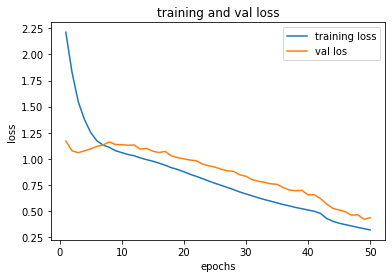

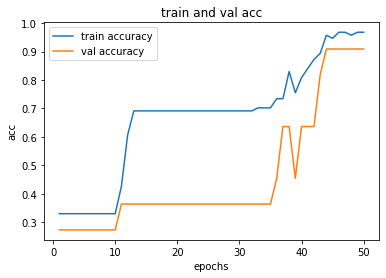

In [11]:
process_plot(history_sequential)

* 看一下 accuracy

In [12]:
acc_score(X_test, y_test, model_seq)

0.9333333333333333

### Functional

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [14]:
# model definition
model_input = Input(shape=X.shape[-1])
x = Dense(8,activation='relu')(model_input)
x = Dense(16,activation='relu')(x)
model_output = Dense(3,activation='softmax')(x)
model_func = Model(model_input, model_output)

# model structure
model_func.summary()   # Weights = (4+1)*8+(8+1)*16+(16+1)*3

# 編譯模型
optim = Adam(lr=0.001)
model_func.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

# 參數
batch_size=7
epochs = 50

# 訓練模型
history_func = model_func.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=False,
                    shuffle=True,
                    validation_split=0.1)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


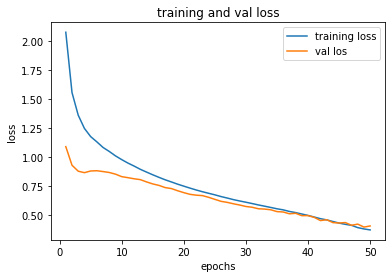

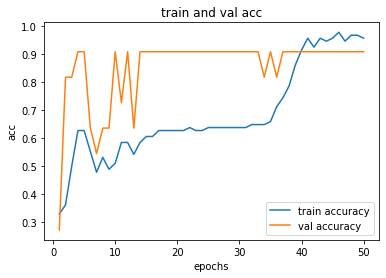

In [15]:
process_plot(history_func)

In [16]:
acc_score(X_test, y_test, model_func)

0.9555555555555556

### Model

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [18]:
# 使用 class 客製化 Models
class MyClassifier(Model):
    def __init__(self):
        super(MyClassifier,self).__init__()
        
        # 定義各種會用到的 layer
        self.layer_1 = Dense(8 , activation='relu')
        self.layer_2 = Dense(16 , activation='relu')
        self.output_layer = Dense(3 , activation='softmax')
        
    def call(self,x):
        # 這邊用 functional api 的寫法，定義出 forward propagation 的結果
        x_1 = self.layer_1(x)
        x_2 = self.layer_2(x_1)
        predict = self.output_layer(x_2)
        return predict

In [19]:
# model definition
model_class = MyClassifier()

# 編譯模型
optim = Adam(lr=0.001)
model_class.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

# 參數
batch_size=7
epochs = 50

# 訓練模型
history_class = model_class.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=False,
                    shuffle=True,
                    validation_split=0.1)

# model structure
model_class.summary()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Model: "my_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  40        
_________________________________________________________________
dense_7 (Dense)              multiple                  144       
_________________________________________________________________
dense_8 (Dense)              multiple                  51        
Total params: 235
Train

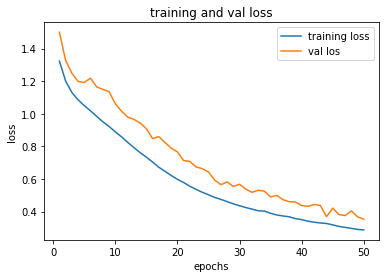

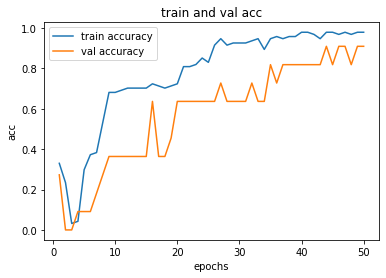

In [20]:
process_plot(history_class)

In [21]:
acc_score(X_test, y_test, model_class)

0.9555555555555556